# NLP - Sentiment analysis - Movie Comments

<img src='./sentiment-analysis.png' height=1200, width=600>

In this project, i aim to accomplish a Sentiment analysis with NLP techniques on a Movie Comments Dataset. Here is the 
<a href='https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews'>dataset source on kaggle</a>

<ul>
dataset columns:
<li>review - users's comment on movies</li>

<li>sentiment - labeled column for the reviews</li>
</ul>

In [100]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB


df = pd.read_csv('IMDB-Dataset-1000rows.csv')

#df = df[0:1000] #lets chop df down to 1000 rows
#df.to_csv('IMDB-Dataset-1000rows.csv', index=False) #save memory space

In [101]:
df.tail()

review sentiment
995  Nothing is sacred. Just ask Ernie Fosselius. T...  positive
996  I hated it. I hate self-aware pretentious inan...  negative
997  I usually try to be professional and construct...  negative
998  If you like me is going to see this in a film ...  negative
999  This is like a zoology textbook, given that it...  negative

In [102]:
# Tokenization - Lets chop unnecessary words down eg. stopwords
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df['review'] = df['review'].apply(clean)

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


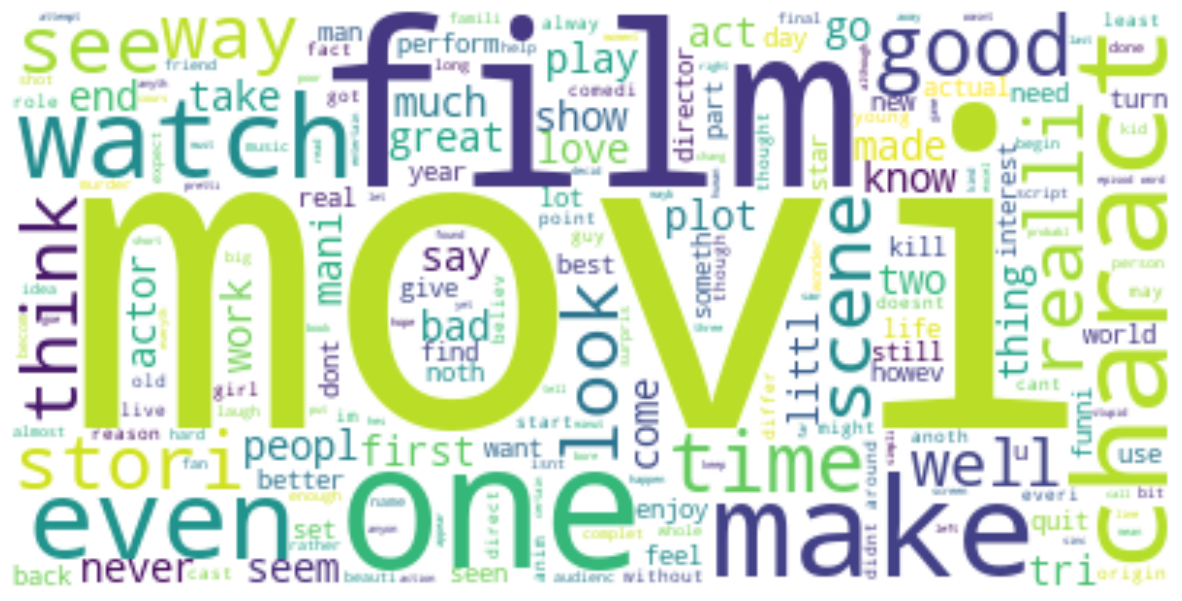

In [103]:
# before moving forward, let's have a quick look at the wordcloud of the review column to have some insight

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [104]:
# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

x=np.array(df['review'])
y=np.array(df['sentiment']) 

cv= CountVectorizer()
#tfidf = TfidfVectorizer()


x=tfidf.fit_transform(x)
x=x.toarray()
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=.20,
                                              random_state=42)
#df['sentiment'].shape

In [105]:
# Text Classification
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [106]:
# Prediction accuracy Metrics
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.845

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85       104
    positive       0.84      0.84      0.84        96

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.85       200



### we successfully done sentiment analysis with PassiveAggresiveClassifier model on our dataset and calculated metrics